## Data Camp Project

# Credit Card Fraud Detection 

Authors:
  * Yuhe Bai
  * Jérôme Bonnin
  * Louis Mercier
  * Dan Allouche
  * Lotfi Kobrosly

## Table of contents

## Introduction

The nomber of credit card transaction are increasing with technological developments the rise of e-commerce. It is a fact, credit card payments facilitate buisness activities. However, a significant problem appears : credit card fraud.

Statistics show that, in 2018 the global economic loss caused by credit
card fraud was 27.85 billion dollars, an increase of 16.2%
compared with 23.97 billion dollars in 2017. Imagine this trend
continues, by 2023 the economic losses caused by credit card
fraud will exceed 35 billion dollars...

Even if the ratio of fraudulent transactions to normal transactions is approximately 0,006%
worldwide, every fraudulent transaction hurts the reputation of banks. 
This is the reason why banks are investing in fraud detection.
The problem is that detecting fraudulent activities only by examining the transactions is very difficult and costly. Thus, fast
and accurate fraud detection is crucial to maintain customer
satisfaction and confidence. Therefore, banks need to identify these
transactions as quickly as possible and in the least harmful
way for the customer. 

In this way, it is important to use expert rules and statistical based models such as Machine Learning to make a first screen betwenen genuine and potaential fraud and ask the investigators to review only the cases with high risk. Typically, transactions are first filtered by checking some essential conditions and then scored by a predictive model. The predictive
model scores each transaction with high or low risk of fraud and those with high risk generate alerts. Investigators check these alerts and provide a feedback for each alert. These feedbacks can then be used to improve the model.

![](images/1.png)

**The credit card fraud detection process**


In the domain of fraud detection, the use of machine learning techniques is attractive for a number of reasons:
*  they allow to discovery patterns in high dimensional data streams, i.e. transactions arrive as a continuous stream and each transaction is defined by many
variables.
*  they are able to automatically integrate investigators feedbacks to improve the accuracy of the detection, while in the case of expert system, including investigators feedbacks requires rules revision that can be tedious and time consuming.

However, in
credit fraud situations, the number of positive (fraudulent)
cases is much smaller than the number of negative cases.
This creates a problem of imbalanced classification, where
one class is very much smaller than the other class.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as imb
from sklearn.metrics import roc_auc_score
%matplotlib inline

## The data

Credit card fraud detection relies on the analysis of recorded transactions. Transaction
data are mainly composed of a number of attributes (e.g. credit card identifier, transaction date, recipient, amount of the transaction).
Automatic systems are essential since
it is not always possible or easy for a human analyst to detect fraudulent patterns in
transaction datasets, often characterized by a large number of samples, many dimensions and online updates. 

Data can be downloaded via this [link](http://ulb.ac.be/adalpozz/data/creditcard.Rdata) (and then loaded using `pyreadr` package) or via this [drive](https://drive.google.com/u/0/uc?export=download&confirm=bEB7&id=1lTnDJ15wWIJKNR1TNsP9C29mypi88Nj5) as a `.csv` file. 

The full dataset contains information about credit card transactions conducted
by cardholders in Europe over two days in September 2013.
It contains only numerical input variables which
are the result of a PCA (principal components analysis)
transformation. Unfortunately, due to confidentiality issues,
we cannot get the original features and more background
information about the data.

In [3]:
df = pd.read_csv('train.csv').drop(columns=['Time'])
print('The data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The data frame has 227846 rows and 30 columns.


In [4]:
# Check if the data is clean
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227846 entries, 0 to 227845
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      227846 non-null  float64
 1   V2      227846 non-null  float64
 2   V3      227846 non-null  float64
 3   V4      227846 non-null  float64
 4   V5      227846 non-null  float64
 5   V6      227846 non-null  float64
 6   V7      227846 non-null  float64
 7   V8      227846 non-null  float64
 8   V9      227846 non-null  float64
 9   V10     227846 non-null  float64
 10  V11     227846 non-null  float64
 11  V12     227846 non-null  float64
 12  V13     227846 non-null  float64
 13  V14     227846 non-null  float64
 14  V15     227846 non-null  float64
 15  V16     227846 non-null  float64
 16  V17     227846 non-null  float64
 17  V18     227846 non-null  float64
 18  V19     227846 non-null  float64
 19  V20     227846 non-null  float64
 20  V21     227846 non-null  float64
 21  V22     22

Text(0.5, 1.0, 'Heatmap of Correlation')

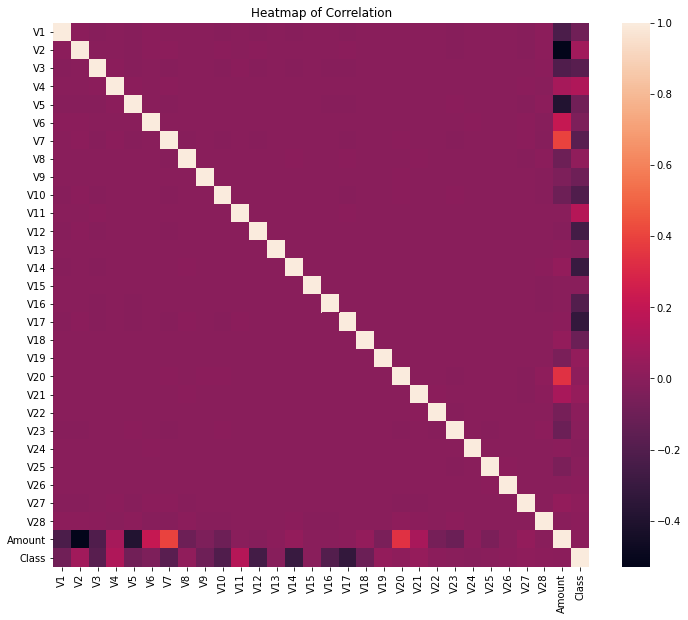

In [5]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

We can see that $(V_i)_{i \in \{1,\cdots,28\}}$ is a sequence of uncorrelated variable.

In [18]:
from sklearn.model_selection import train_test_split
X, y = np.array(df.drop(columns=['Class'])), np.array(df.Class)

Researchers have proposed many measurement metrics to
detect the performance of imbalanced classification models.
These metrics include recall rate [17], [38], specificity [17],
precision [17], [38], F-measure [17], [38], and accuracy. In
this paper, we focus on two indicators: precision and Fmeasure. In credit card fraud, these are considered the most
important indicators. Precision is the ratio of the number of
real positive cases and the number of predicted positive cases.
In the detection of credit card fraud, the first goal is to provide
the maximum truth, that is, the highest precision. In practice,
a false alarm can lead to a poor customer experience, and
potentially lead to the loss of customers, so the precision
of the model is very important, and is considered the most
important indicator of the fraud system. On the other hand,
although precision can be increased by reducing the model’s
recall rate, it is impossible to improve the precision by
reducing the recall rate without limitation. Recall rate is
the ratio of the number of predicted positive cases to the
number of all real positive cases. Real fraud problems have
real negative economic implications to the enterprise, so the
recall rate is also worthy of our attention. Another indicator
is the F-measure, which takes values on the range [0,1].
The F-measure captures both the precision and recall rate,
measuring improvements in both indicators simultaneously.
In machine learning, this index is often used to evaluate the
advantages and disadvantages of various algorithms, because
it can evaluate the precision and recall rate in combination.
Accuracy is a commonly used indicator, which represents the
proportion between the number of correctly classified cases
and the total number of cases. If the accuracy of a model
is too low, it cannot be applied in practice. Specificity is
the ratio of the number of predicted negative cases predicted
to be negative to the number of real negative cases. In the
experiment, we consider these five indicators to measure the
performance of the model.


### An unbalanced problem

In [13]:
df_0 = df[df.Class == 0]
df_1 = df[df.Class == 1]

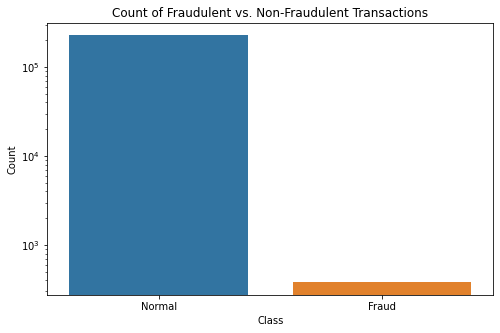

In [10]:
counts = df.Class.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(counts.index, counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.yscale('log')
plt.show()

In [11]:
print('There are {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(counts[0], counts[0] * 100 / df.shape[0], counts[1], counts[1] * 100 / df.shape[0]))

There are 227467 non-fraudulent transactions (99.834%) and 379 fraudulent transactions (0.166%).


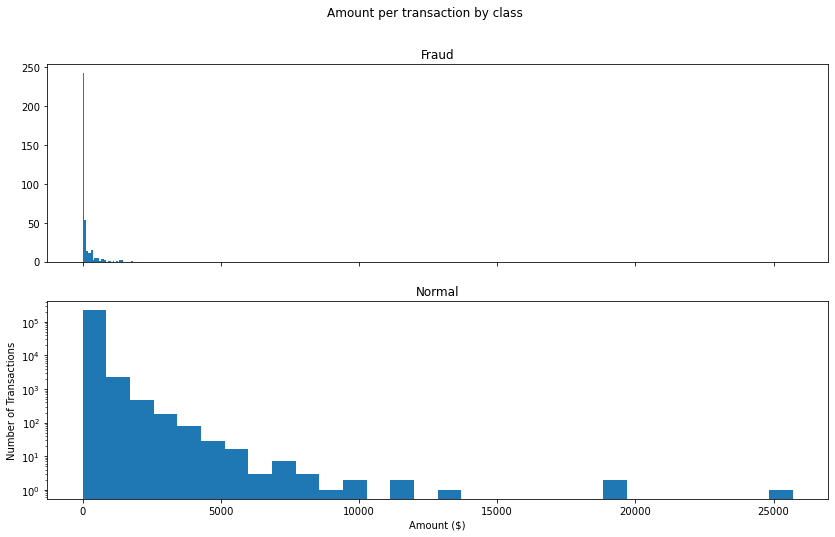

In [14]:
f, axs = plt.subplots(2, 1, sharex=True, figsize=(14,8))
f.suptitle('Amount per transaction by class')
bins = 30
axs[0].hist(df_1.Amount, bins = bins)
axs[0].set_title('Fraud')
axs[1].hist(df_0.Amount, bins = bins)
axs[1].set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

## Metric

In binary classification problem, the natural metric is the accuracy defined by : $\frac{1}{n}\sum_{i=1}^n\mathbb{1}\{y_i^{true}=y_i^{pred}\}$.

Let's look at the score using the optimistic predictor that only predicts normal transactions:

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y)
y_pred = np.zeros(y_test.shape)
score = accuracy_score(y_test, y_pred)
print('The accuracy for the optimistic predictor is {:.3f}'.format(score))

The accuracy for the optimistic predictor is 0.998


The accuracy seems good, this shows the limit of this metric. Indeed, we are in an unbalanced classification problem, therfore predicting always the majoritary class leads to a good accuracy.
To see exactly what happens we use the confusions matrix

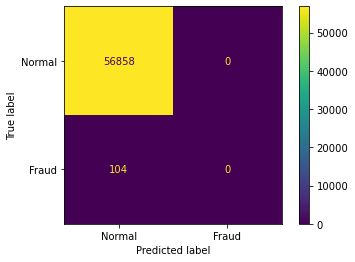

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
CM.plot()
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.yticks(range(2), ['Normal', 'Fraud'])
plt.show()

We can see that 128 fraudulent cases are predicted as normal transactions. Our problematic is totaly not solved.

Other classification measures based on the confusion matrix are:

![](images/2.PNG)
Source: Wikipedia (en.wikipedia.org/wiki/sensitivity_and_specificity)

Standard classification measure such as TPR and TNR are misleading assessment measures in unbalanced class problem.
Imagine a classifier with TPR=99%
and TNR=99% , if we have 1% of positive samples, then Precision is only 0.5.
Even worse, if we have only 0.1% of positives, then Precision is 0.09.


Pour l'instant je pars pour ces mesures:

In credit card fraud, precision and F-measure are considered the most
important indicators. Precision is the ratio of the number of
real positive cases and the number of predicted positive cases.
In the detection of credit card fraud, the first goal is to provide
the maximum truth, that is, the highest precision. In practice,
a false alarm can lead to a poor customer experience, and
potentially lead to the loss of customers, so the precision
of the model is very important, and is considered the most
important indicator of the fraud system. On the other hand,
although precision can be increased by reducing the model’s
recall rate, it is impossible to improve the precision by
reducing the recall rate without limitation. Recall rate is
the ratio of the number of predicted positive cases to the
number of all real positive cases. Real fraud problems have
real negative economic implications to the enterprise, so the
recall rate is also worthy of our attention. Another indicator
is the F-measure.
The F-measure captures both the precision and recall rate,
measuring improvements in both indicators simultaneously.


(((A well-accepted measure for unbalanced classification is the Area Under the ROC Curve (AUC). This metric gives a measure of how much the ROC curve is
close to the point of perfect classification.

(The Receiving Operating Characteristic (ROC) curve is a well-know assessment
technique that allows evaluating the performance of a classifier over a range of different
thresholds. It is obtained by plotting TPR against FPR, where each
point of the curve corresponds to a different classification threshold.)

Moreover a relevant measure in unbalanced problem is the F-measure, but this measure can be computed only once a confusion matrix is available,
which means that their values depend on the threshold used for classification.)))


Choosing a good performance measure is not a trivial task in the case of fraud detection.
Fraud detection must deal with the following challenges:
* unbalanced class sizes
* cost structure of the problem (the cost of a fraud is not easy to define)
* time to detection (a card should be blocked as soon as it is found victim of fraud,
quick reaction to the appearance of the first can prevent other frauds)
*  errors in classlabels (quantify unreported frauds)
*  reputation’s cost for the company.


## Techniques for unbalanced classification tasks
Learning from unbalanced datasets is a difficult task since most learning algorithms are
not designed to cope with a large difference between the number of cases belonging to
different classes.

There are several methods that deal with this problem and we can
distinguish between methods that operate at the data and algorithmic levels.

 At
the data level, the unbalanced strategies are used as a pre-processing step to rebalance
the dataset or to remove the noise between the two classes, before any algorithm is
applied. At the algorithmic level, algorithms are themselves adjusted to deal with the
minority class detection.


### Oversampling

Oversampling consists in up-sizing the small class by:
* generating synthetic examples in the
neighborhood of observed ones (SMOTE)
* replicating the minority class untit the two classes have equal frequency




In [21]:
from imblearn import over_sampling
svm_smote = over_sampling.SVMSMOTE(n_jobs=-1)
X_svm , y_svm = svm_smote.fit_resample(X, y)
pd.value_counts(y_svm)

1    227467
0    227467
dtype: int64

### Undersampling

Undersampling consists in downsizing the majority class by:
*  randomly selecting a subset of data for the targeted class
*  removing observations from the majority class that are closed to the minority class region in order to return a dataset that presents a better separation between the two classes. (Tomek link)
*  eliminating the exemples from the majority class that are distant from the decision border



In [22]:
from imblearn import under_sampling
repENN = under_sampling.RepeatedEditedNearestNeighbours(n_neighbors=20, n_jobs=-1)
X_repENN, y_repENN = repENN.fit_resample(X, y)
pd.value_counts(y_repENN)


0    226306
1       379
dtype: int64

### Combining over and under sampling

In [23]:
X_comb, y_comb = under_sampling.RepeatedEditedNearestNeighbours(sampling_strategy='all', n_neighbors=20, n_jobs=-1).fit_resample(X_svm, y_svm)

### First model : Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
C = [10 ** i for i in range(-4,5)]
for c in C:
    model = LogisticRegression(C=c)
    cvscore = cross_val_score(model, X, y, groups=y, scoring='f1', cv=10, n_jobs=-1)
    print('The cvscore for the Logit with C={} is : {:.3f}'.format(c, cvscore.mean()))


The cvscore for the Logit with C=0.0001 is : 0.324
The cvscore for the Logit with C=0.001 is : 0.634
The cvscore for the Logit with C=0.01 is : 0.715
The cvscore for the Logit with C=0.1 is : 0.712
The cvscore for the Logit with C=1 is : 0.713
The cvscore for the Logit with C=10 is : 0.734
The cvscore for the Logit with C=100 is : 0.716
The cvscore for the Logit with C=1000 is : 0.714
The cvscore for the Logit with C=10000 is : 0.725


In [35]:
for c in C:
    model = LogisticRegression(C=c)
    cvscore = cross_val_score(model, X_comb, y_comb, groups=y_comb, scoring='f1', cv=10, n_jobs=-1)
    print('The cvscore for the Logit after over-under sampling with C={} is : {:.3f}'.format(c, cvscore.mean()))

The cvscore for the Logit after over-under sampling with C=0.0001 is : 0.982
The cvscore for the Logit after over-under sampling with C=0.001 is : 0.988
The cvscore for the Logit after over-under sampling with C=0.01 is : 0.992
The cvscore for the Logit after over-under sampling with C=0.1 is : 0.993
The cvscore for the Logit after over-under sampling with C=1 is : 0.994
The cvscore for the Logit after over-under sampling with C=10 is : 0.993
The cvscore for the Logit after over-under sampling with C=100 is : 0.994
The cvscore for the Logit after over-under sampling with C=1000 is : 0.994
The cvscore for the Logit after over-under sampling with C=10000 is : 0.994


Combining over and undersampling improve our model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 30, 50), activation='relu', solver='adam', alpha=10e-4, batch_size=1, learning_rate='constant', learning_rate_init=0.0001, max_iter=400, shuffle=True)
cvscore = cross_val_score(mlp, X_comb, y_comb, groups=y_comb, scoring='f1', cv=10, n_jobs=-1)


### Principal Component Analysis

In [64]:
from sklearn.decomposition import PCA

In [65]:
x_cols = list(df.columns)
x_cols.remove("Class")
X, y = df[x_cols], df["Class"]

In [66]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

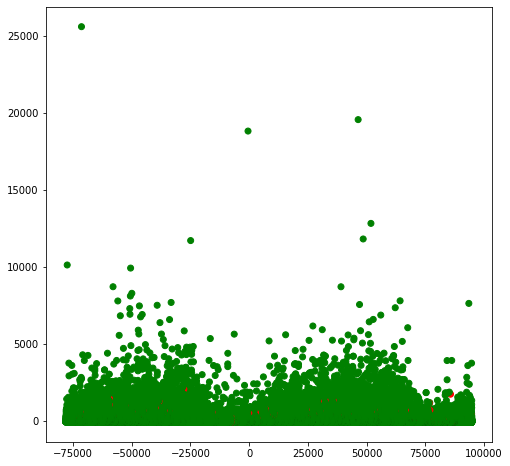

In [68]:
color = np.where(y == 1, 'red', 'green')
fig = plt.figure(figsize=(8, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color)

There seems to be little to no information here. Let's try this with a sample

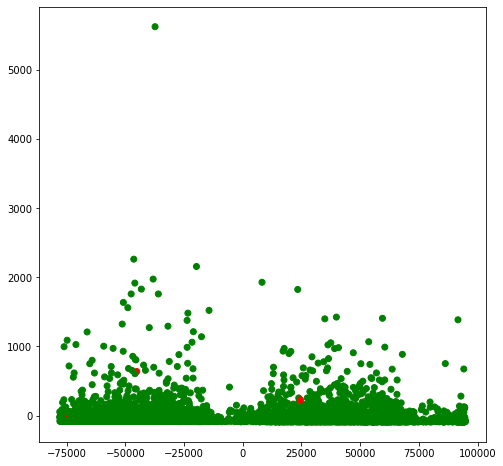

In [71]:
samples = np.random.choice(np.arange(X.shape[0]), np.sum(y == 1) * 10)
X_sample, y_sample = X_reduced[samples], y[samples]
color = np.where(y_sample == 1, 'red', 'green')
fig = plt.figure(figsize=(8, 8))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=color)    

It seems that there is little information provided by the PCA. Let's try to see other indicators that may characterize the fradulent clients data. We saw the influence of the number of transactions, let's see if the variable **Time** has any relevant information

In [72]:
print("For fraudulent clients:")
X_fraud = X["Time"][y == 1]
print("Mean: ", X_fraud.mean(), ", Standard Deviation: ", X_fraud.std())
print("Min: ", X_fraud.min(), " and max: ", X_fraud.max(), "\n")

print("For non fraudulent clients:")
X_normal = X["Time"][y == 0]
print("Mean: ", X_normal.mean(), ", Standard Deviation: ", X_normal.std())
print("Min: ", X_normal.min(), " and max: ", X_normal.max(), "\n")

For fraudulent clients:
Mean:  80746.80691056911 , Standard Deviation:  47835.36513767505
Min:  406.0  and max:  170348.0 

For non fraudulent clients:
Mean:  94838.20225805884 , Standard Deviation:  47484.0157855503
Min:  0.0  and max:  172792.0 



It appears that the mean of the variable **Time** for clients that have committed fraud is shifted when compared to the other clients, but this shift is not very clear as the standard deviation is too big to prevent an overlap. The fraudulent client's data seems also engulfed in the normal data (when we compare the max and min values)